In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
#jtplot.style()
jtplot.reset()

In [67]:
### lists and dicts to help clear dataframes
#list of columns i want to keep
const_cols = ["Province/State", "Country", "Country/Region", "Date last updated", "Last Update", "Confirmed", "Recovered", "Deaths"]
#dict of column names to change
column_names = {"Country": "Country/Region", "Date last updated": "Last Update"}
#dict of columns and values to put in NaNs
fillna_values = {'Province/State': "", "Country/Region": "", "Confirmed": 0, "Recovered": 0, "Deaths":0}

In [68]:
def read_time_series_csv(url):
    
    df_ts = pd.read_csv(url)
    
    df_ts = df_ts.dropna(axis=0, how='all')
    df_ts = df_ts.dropna(axis=1, how='all')

    df_text = df_ts[df_ts.columns[0:2]]
    df_text = df_text.fillna(value = '')
    
    df_val = df_ts[df_ts.columns[2:len(df_ts.columns)]]
    df_val = df_val.fillna(value = 0)
    
    df_ts = pd.concat([df_text,df_val],axis=1)

    return df_ts

In [69]:
def save_one_file(df_confirmed, df_deaths, df_recovered, file_name):
    with pd.ExcelWriter(file_name, engine='xlsxwriter') as writer:
        df_confirmed.to_excel(writer, sheet_name='Confirmed')
        df_deaths.to_excel(writer, sheet_name='Deaths')
        df_recovered.to_excel(writer, sheet_name='Recovered')

In [70]:
url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
url_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
url_recovered = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"

In [71]:
df_confirmed = read_time_series_csv(url_confirmed)
df_deaths = read_time_series_csv(url_deaths)
df_recovered = read_time_series_csv(url_recovered)

In [72]:
save_one_file(df_confirmed, df_deaths, df_recovered, "TimeSeries.xlsx")

In [73]:
df_confirmed_groupby = df_confirmed.groupby('Country/Region').sum()
df_deaths_groupby = df_deaths.groupby('Country/Region').sum()
df_recovered_groupby = df_recovered.groupby('Country/Region').sum()

save_one_file(df_confirmed_groupby, df_deaths_groupby, df_recovered_groupby, "CasesByCountry.xlsx")

In [74]:
print("Shape of df_confirmed: {}".format(df_confirmed.shape))
print("Shape of df_deaths: {}".format(df_deaths.shape))
print("Shape of df_recovered: {}".format(df_recovered.shape))

#printing whole df
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(df_confirmed)

Shape of df_confirmed: (406, 55)
Shape of df_deaths: (406, 55)
Shape of df_recovered: (406, 55)


In [75]:
#df_confirmed[df_confirmed['Country/Region']=="China"]

In [76]:
china_confirmed = df_confirmed[df_confirmed['Country/Region']=="China"].iloc[:,4:].sum(axis=0)
china_deaths = df_deaths[df_deaths['Country/Region']=="China"].iloc[:,4:].sum(axis=0)
china_recovered = df_recovered[df_recovered['Country/Region']=="China"].iloc[:,4:].sum(axis=0)

print(china_confirmed)
#print(china_recovered_series)
#print(china_deaths_series)

1/22/20      548
1/23/20      643
1/24/20      920
1/25/20     1406
1/26/20     2075
1/27/20     2877
1/28/20     5509
1/29/20     6087
1/30/20     8141
1/31/20     9802
2/1/20     11891
2/2/20     16630
2/3/20     19716
2/4/20     23707
2/5/20     27440
2/6/20     30587
2/7/20     34110
2/8/20     36814
2/9/20     39829
2/10/20    42354
2/11/20    44386
2/12/20    44759
2/13/20    59895
2/14/20    66358
2/15/20    68413
2/16/20    70513
2/17/20    72434
2/18/20    74211
2/19/20    74619
2/20/20    75077
2/21/20    75550
2/22/20    77001
2/23/20    77022
2/24/20    77241
2/25/20    77754
2/26/20    78166
2/27/20    78600
2/28/20    78928
2/29/20    79356
3/1/20     79932
3/2/20     80136
3/3/20     80261
3/4/20     80386
3/5/20     80537
3/6/20     80690
3/7/20     80770
3/8/20     80823
3/9/20     80860
3/10/20    80887
3/11/20    80921
3/12/20    80932
dtype: int64


In [77]:
dates_confirmed = china_confirmed.index.values
dates_deaths = china_deaths.index.values
dates_recovered = china_recovered.index.values

print(dates_confirmed)
#print(dates_1)
#print(dates_2)

dates_datetime_confirmed = pd.to_datetime(dates_confirmed, infer_datetime_format=True)
dates_datetime_deaths = pd.to_datetime(dates_deaths, infer_datetime_format=True)
dates_datetime_recovered = pd.to_datetime(dates_recovered, infer_datetime_format=True)

print(dates_datetime_confirmed)


['1/22/20' '1/23/20' '1/24/20' '1/25/20' '1/26/20' '1/27/20' '1/28/20'
 '1/29/20' '1/30/20' '1/31/20' '2/1/20' '2/2/20' '2/3/20' '2/4/20'
 '2/5/20' '2/6/20' '2/7/20' '2/8/20' '2/9/20' '2/10/20' '2/11/20'
 '2/12/20' '2/13/20' '2/14/20' '2/15/20' '2/16/20' '2/17/20' '2/18/20'
 '2/19/20' '2/20/20' '2/21/20' '2/22/20' '2/23/20' '2/24/20' '2/25/20'
 '2/26/20' '2/27/20' '2/28/20' '2/29/20' '3/1/20' '3/2/20' '3/3/20'
 '3/4/20' '3/5/20' '3/6/20' '3/7/20' '3/8/20' '3/9/20' '3/10/20' '3/11/20'
 '3/12/20']
DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
  

In [78]:
#something for converting datetime for x axis
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

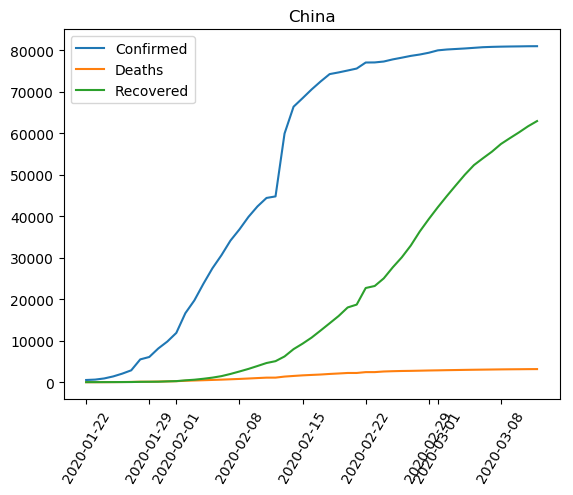

In [79]:
plt.plot(dates_datetime_confirmed, china_confirmed, dates_datetime_deaths, china_deaths, dates_datetime_recovered, china_recovered)
plt.xticks(rotation=60)
plt.legend(['Confirmed', 'Deaths', 'Recovered'])
plt.title("China")
plt.savefig("img/china.png",bbox_inches='tight')

In [80]:
countries_ts = df_confirmed['Country/Region'].unique()
print(len(countries_ts))
print(countries_ts)

116
['Thailand' 'Japan' 'Singapore' 'Nepal' 'Malaysia' 'Canada' 'Australia'
 'Cambodia' 'Sri Lanka' 'Germany' 'Finland' 'United Arab Emirates'
 'Philippines' 'India' 'Italy' 'Sweden' 'Spain' 'Belgium' 'Egypt'
 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait' 'Algeria'
 'Croatia' 'Switzerland' 'Austria' 'Israel' 'Pakistan' 'Brazil' 'Georgia'
 'Greece' 'North Macedonia' 'Norway' 'Romania' 'Estonia' 'Netherlands'
 'San Marino' 'Belarus' 'Iceland' 'Lithuania' 'Mexico' 'New Zealand'
 'Nigeria' 'Ireland' 'Luxembourg' 'Monaco' 'Qatar' 'Ecuador' 'Azerbaijan'
 'Armenia' 'Dominican Republic' 'Indonesia' 'Portugal' 'Andorra' 'Latvia'
 'Morocco' 'Saudi Arabia' 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine'
 'Hungary' 'Liechtenstein' 'Poland' 'Tunisia' 'Bosnia and Herzegovina'
 'Slovenia' 'South Africa' 'Bhutan' 'Cameroon' 'Colombia' 'Costa Rica'
 'Peru' 'Serbia' 'Slovakia' 'Togo' 'French Guiana' 'Malta' 'Martinique'
 'Bulgaria' 'Maldives' 'Bangladesh' 'Paraguay' 'Albania' 'Cyprus' 'Brune

In [81]:
#for country in countries_ts:
    #plt.plot(dates_datetime, ts_df_list[0][ts_df_list[0]['Country/Region']==country].iloc[:,5:].sum(axis=0))
    #plt.show()

In [82]:
#math for using floor
import math

In [83]:
# #country_confirmed = df_confirmed[df_confirmed['Country/Region']==countries_ts[0]].iloc[:,5:].sum(axis=0)
# #dates_confirmed = country_confirmed.index.values
# #dates_datetime_confirmed = pd.to_datetime(dates_confirmed, infer_datetime_format=True)

# #country_deaths = df_deaths[df_deaths['Country/Region']==countries_ts[0]].iloc[:,5:].sum(axis=0)
# #dates_deaths = country_deaths.index.values
# #dates_datetime_deaths = pd.to_datetime(dates_deaths, infer_datetime_format=True)

# #country_recovered = df_recovered[df_recovered['Country/Region']==countries_ts[0]].iloc[:,5:].sum(axis=0)
# #dates_recovered = country_recovered.index.values
# #dates_datetime_recovered = pd.to_datetime(dates_recovered, infer_datetime_format=True)
    
# plots_in_row = 4
# #define how many rows on how many countries in list without china
# plots_in_col = math.ceil((len(countries_ts)-1)/plots_in_row)

# print(plots_in_col)

# fig, axs = plt.subplots(plots_in_col, plots_in_row, figsize=(15, 25), sharey=True, sharex=True)
# fig.autofmt_xdate(rotation=60)

# axs0 = axs.shape[0]
# axs1 = axs.shape[1]

# i = 0
# j = 0

# for country in countries_ts[1:]:
    
#     axs[i][j].plot(dates_datetime_confirmed,df_confirmed[df_confirmed['Country/Region']==country].iloc[:,4:].sum(axis=0))
#     axs[i][j].plot(dates_datetime_deaths,df_deaths[df_deaths['Country/Region']==country].iloc[:,4:].sum(axis=0))
#     axs[i][j].plot(dates_datetime_recovered,df_recovered[df_recovered['Country/Region']==country].iloc[:,4:].sum(axis=0))
#     axs[i][j].set_title(country)
#     #axs[i][j].set_xticklabels(rotation=90)
#     i = i + 1
#     if i==plots_in_col:
#         i = 0
#         j = j + 1
#         if j==plots_in_row:
#             j = 0
# fig.suptitle('All countries excpect China',y=0.91)
# fig.legend(['Confirmed', 'Deaths', 'Recovered'],loc='upper left', bbox_to_anchor=(0., 0., 0.5, 0.5),bbox_transform=plt.gcf().transFigure)
# #plt.savefig("img/rest.png",bbox_inches='tight')

In [84]:
#list of number of confirmed cases from last column
confirmed_country = []
row = len(dates_confirmed)-1
for country in countries_ts:
    confirmed_country.append(df_confirmed[df_confirmed['Country/Region']==country].iloc[:,4:].sum(axis=0)[row])

ccc = confirmed_country.copy()
ccc.sort()
print(ccc)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 8, 9, 10, 11, 11, 11, 11, 12, 12, 13, 15, 16, 16, 17, 17, 18, 19, 19, 19, 19, 20, 22, 23, 23, 24, 24, 28, 34, 39, 43, 45, 49, 49, 49, 52, 52, 59, 59, 61, 67, 69, 70, 71, 73, 80, 85, 89, 94, 99, 103, 117, 128, 131, 149, 178, 195, 262, 302, 314, 459, 503, 599, 617, 639, 652, 696, 702, 1663, 2078, 2277, 2284, 7869, 10075, 12462, 80932]


In [85]:
limit_high = 500
limit_low = 50

In [86]:
dictionary = {"Country":countries_ts ,"Confirmed":confirmed_country}

countries_last_date = pd.DataFrame(dictionary)
# print(countries_last_date)

if_over_high_limit = countries_last_date.apply(lambda x: True if x['Confirmed'] > limit_high else False , axis=1)

numOfRows = len(if_over_high_limit[if_over_high_limit == True].index)
 
print('Number of countries with over {} confirmed cases: {}'.format(limit_high,numOfRows))

Number of countries with over 500 confirmed cases: 15


In [87]:
#
indexTrue = if_over_high_limit[ if_over_high_limit == False ].index
indexFalse = if_over_high_limit[ if_over_high_limit == True ].index
print(indexTrue)
print(indexFalse)

#copying to not change original df
countries_over_limit = countries_last_date.copy()
countries_under_limit = countries_last_date.copy()

countries_over_limit.drop(indexTrue, inplace=True, axis=0)
countries_under_limit.drop(indexFalse, inplace=True, axis=0)

#print(countries_over_limit)
#print(countries_under_limit)

Int64Index([  0,   2,   3,   4,   5,   6,   7,   8,  10,  11,
            ...
            106, 107, 108, 109, 110, 111, 112, 113, 114, 115],
           dtype='int64', length=101)
Int64Index([1, 9, 14, 15, 16, 27, 35, 38, 90, 95, 96, 97, 98, 99, 101], dtype='int64')


In [88]:
#print(countries_last_date)

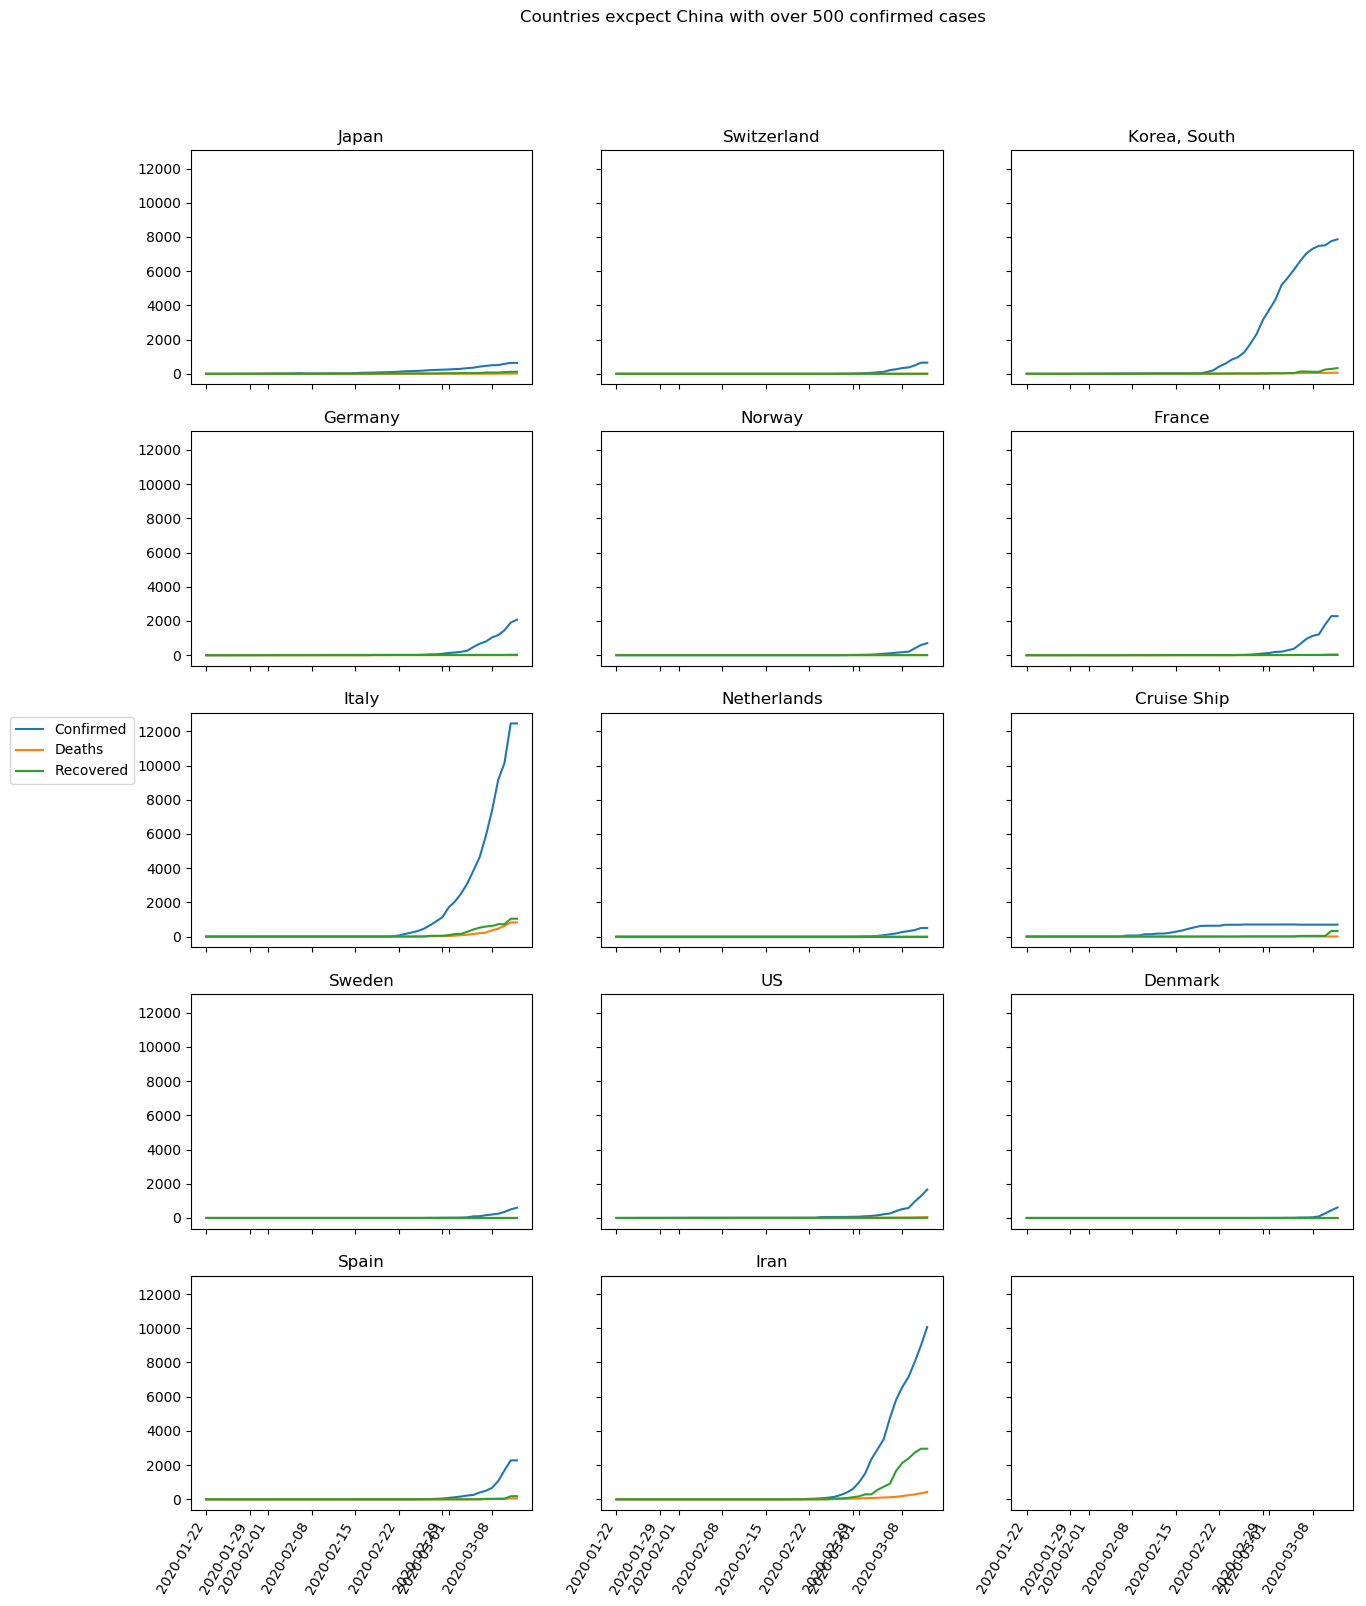

In [89]:
###plot for countries with confirmed cases over limit
plots_in_row = 3
#define how many rows on how many countries in list without china
plots_in_col = math.ceil((numOfRows-1)/plots_in_row)

fig, axs = plt.subplots(plots_in_col, plots_in_row, figsize=(15, plots_in_col*4), sharey=True, sharex=True)
fig.autofmt_xdate(rotation=60)

axs0 = axs.shape[0]
axs1 = axs.shape[1]

i = 0
j = 0



for country in countries_over_limit[countries_over_limit["Country"]!="China"]["Country"]:
    #print(country)
    axs[i][j].plot(dates_datetime_confirmed, df_confirmed[df_confirmed['Country/Region']==country].iloc[:,4:].sum(axis=0))
    axs[i][j].plot(dates_datetime_deaths, df_deaths[df_deaths['Country/Region']==country].iloc[:,4:].sum(axis=0))
    axs[i][j].plot(dates_datetime_recovered, df_recovered[df_recovered['Country/Region']==country].iloc[:,4:].sum(axis=0))
    axs[i][j].set_title(country)
    #axs[i][j].set_xticklabels(rotation=90)
    i = i + 1
    if i==plots_in_col:
        i = 0
        j = j + 1
        if j==plots_in_row:
            j = 0
fig.suptitle('Countries excpect China with over {} confirmed cases'.format(limit_high),y=0.95)
fig.legend(['Confirmed', 'Deaths', 'Recovered'],loc='upper left', bbox_to_anchor=(0., 0.1, 0.5, 0.5),bbox_transform=plt.gcf().transFigure)
plt.savefig("img/rest_over_high_limit.png",bbox_inches='tight')

In [90]:
dictionary = {"Country":countries_ts ,"Confirmed":confirmed_country}

countries_last_date = pd.DataFrame(dictionary)
# print(countries_last_date)

if_over_low_limit = countries_last_date.apply(lambda x: True if x['Confirmed'] > limit_low and x['Confirmed'] < limit_high else False , axis=1)

numOfRows = len(if_over_low_limit[if_over_low_limit == True].index)

print('Number of countries with over {} confirmed cases: {}'.format(limit_low,numOfRows))

Number of countries with over 50 confirmed cases: 26


In [91]:
#
indexTrue = if_over_low_limit[ if_over_low_limit == False ].index
indexFalse = if_over_low_limit[ if_over_low_limit == True ].index
print(indexTrue)
print(indexFalse)

#copying to not change original df
countries_over_limit = countries_last_date.copy()
countries_under_limit = countries_last_date.copy()

countries_over_limit.drop(indexTrue, inplace=True, axis=0)
countries_under_limit.drop(indexFalse, inplace=True, axis=0)

#print(countries_over_limit)
#print(countries_under_limit)

Int64Index([  1,   3,   7,   8,   9,  14,  15,  16,  21,  22,  25,  26,  27,
             30,  32,  34,  35,  36,  37,  38,  40,  42,  43,  44,  45,  46,
             47,  48,  50,  51,  52,  53,  54,  56,  57,  58,  59,  60,  61,
             62,  63,  64,  65,  66,  67,  68,  69,  71,  72,  73,  74,  75,
             76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
             89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 101, 103,
            104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115],
           dtype='int64')
Int64Index([  0,   2,   4,   5,   6,  10,  11,  12,  13,  17,  18,  19,  20,
             23,  24,  28,  29,  31,  33,  39,  41,  49,  55,  70, 100, 102],
           dtype='int64')


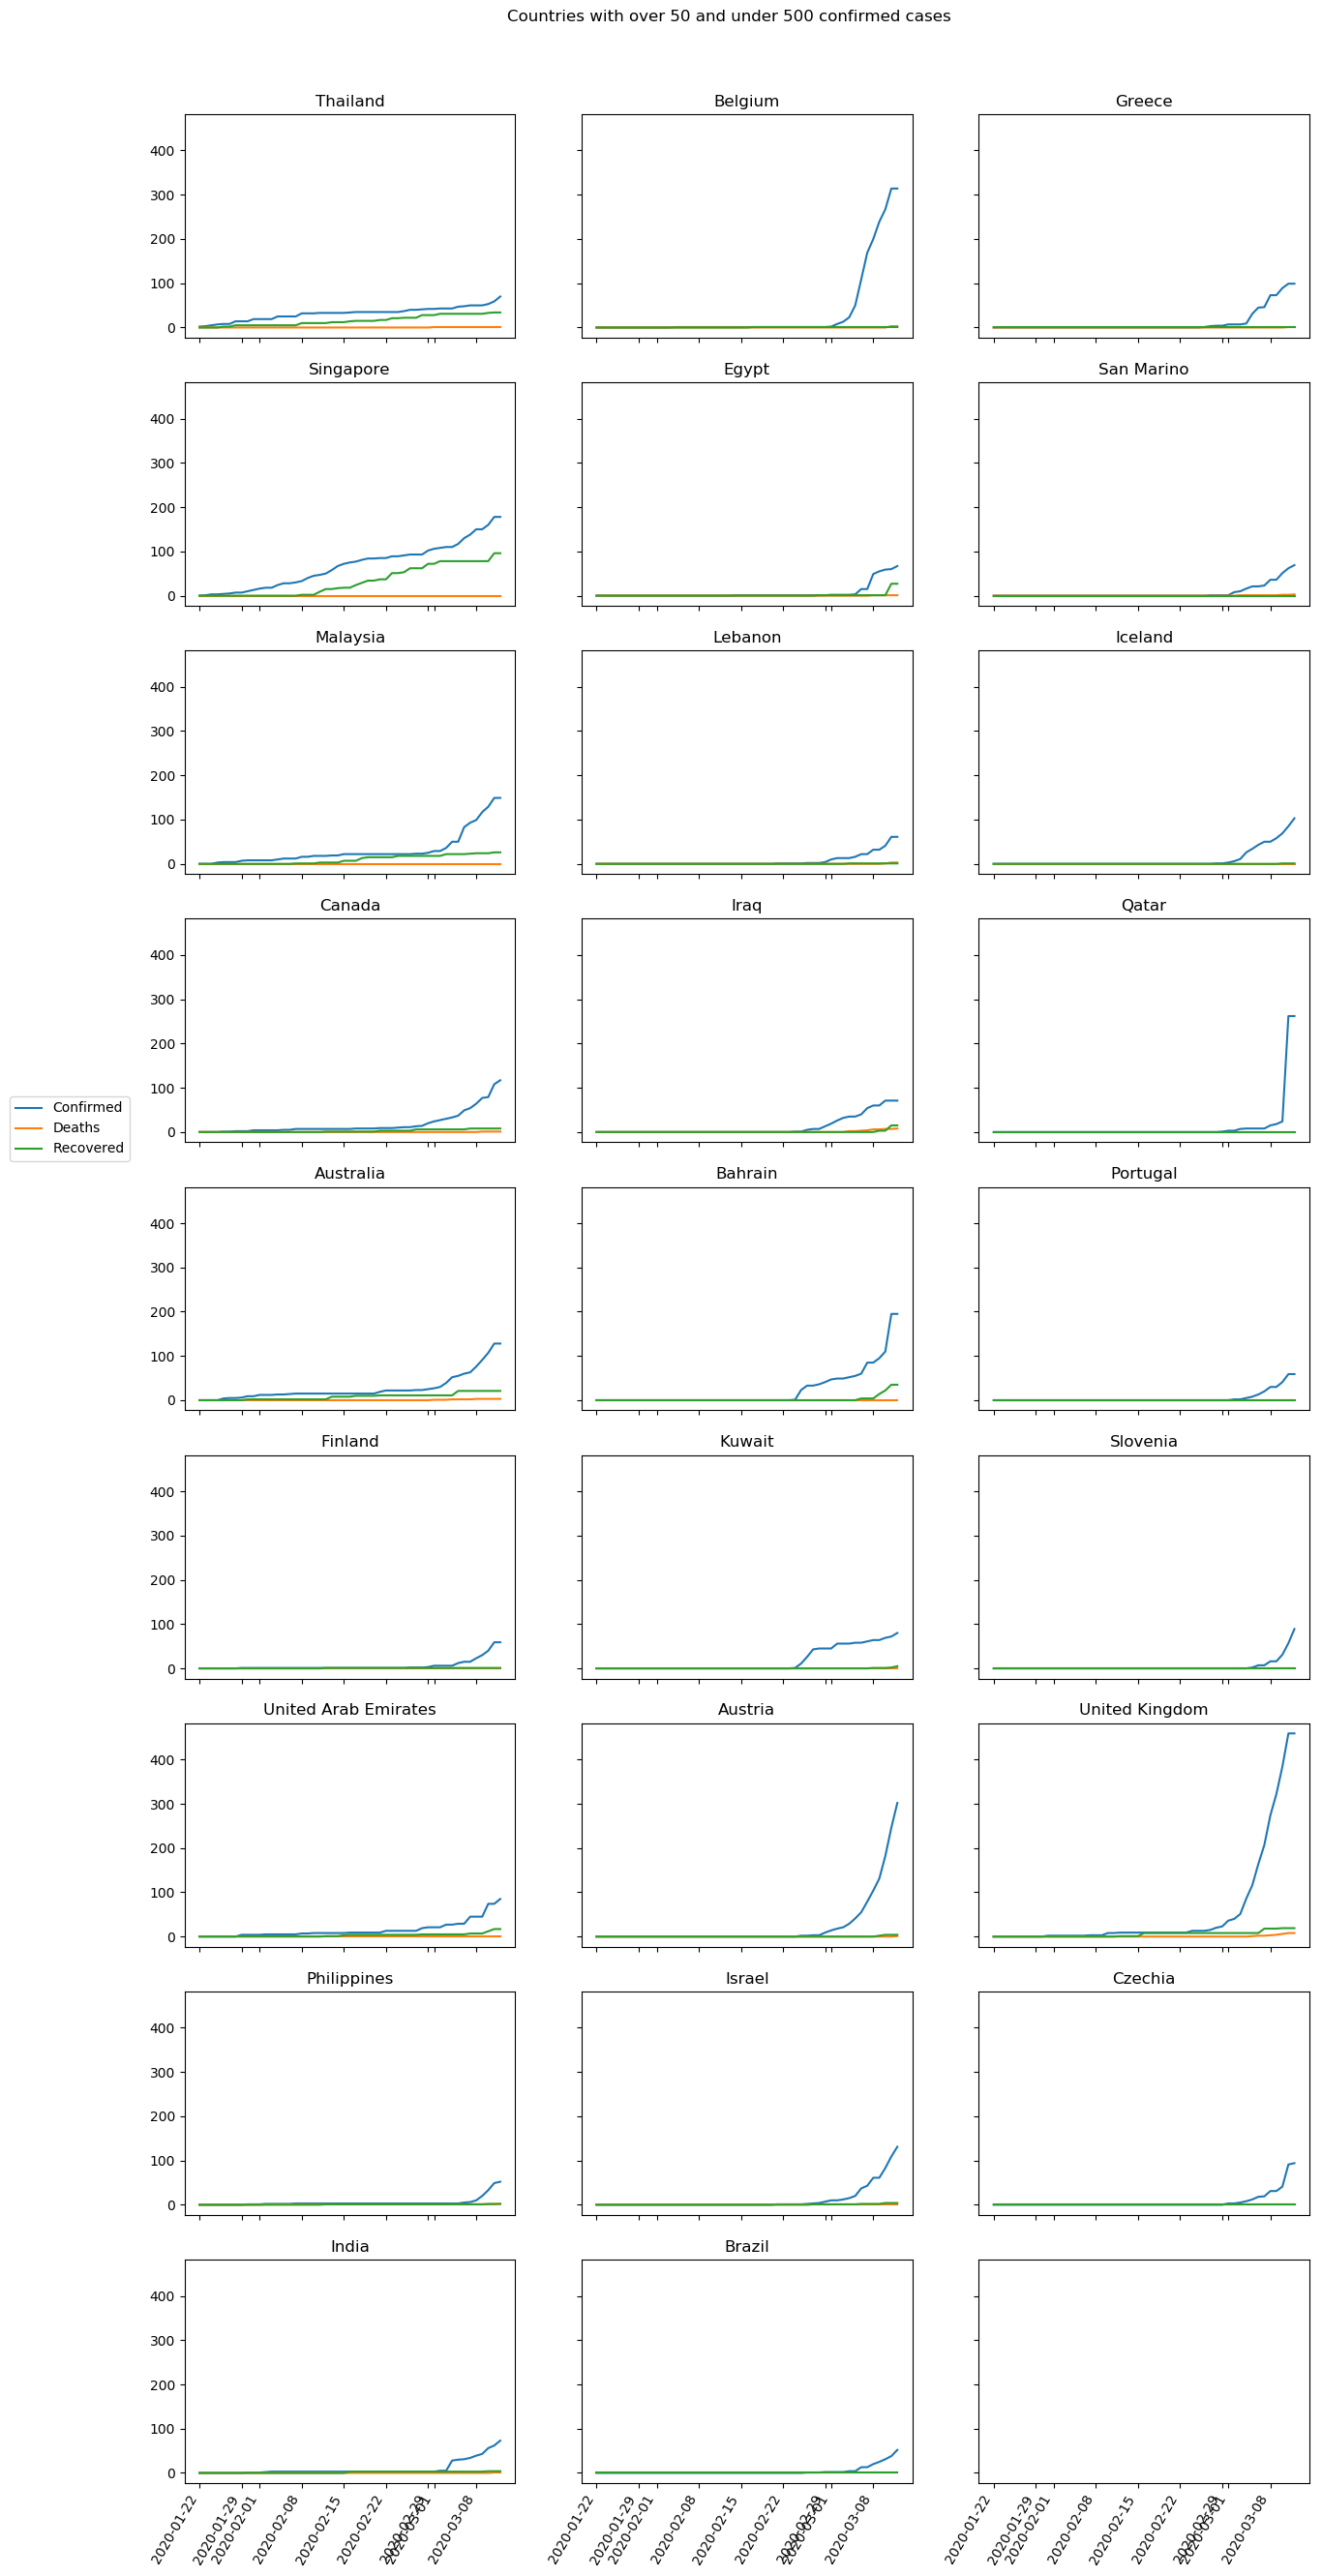

In [92]:
plots_in_row = 3
#define how many rows on how many countries in list without china
plots_in_col = math.ceil((numOfRows)/plots_in_row)

fig, axs = plt.subplots(plots_in_col, plots_in_row, figsize=(15, plots_in_col*4), sharey=True, sharex=True)
fig.autofmt_xdate(rotation=60)

axs0 = axs.shape[0]
axs1 = axs.shape[1]

i = 0
j = 0

for country in countries_over_limit["Country"]:
    #print(country)
    axs[i][j].plot(dates_datetime_confirmed, df_confirmed[df_confirmed['Country/Region']==country].iloc[:,4:].sum(axis=0))
    axs[i][j].plot(dates_datetime_deaths, df_deaths[df_deaths['Country/Region']==country].iloc[:,4:].sum(axis=0))
    axs[i][j].plot(dates_datetime_recovered, df_recovered[df_recovered['Country/Region']==country].iloc[:,4:].sum(axis=0))
    axs[i][j].set_title(country)
    #axs[i][j].set_xticklabels(rotation=90)
    i = i + 1
    if i==plots_in_col:
        i = 0
        j = j + 1
        if j==plots_in_row:
            j = 0
fig.suptitle('Countries with over {} and under {} confirmed cases'.format(limit_low, limit_high),y=0.91)
fig.legend(['Confirmed', 'Deaths', 'Recovered'],loc='upper left', bbox_to_anchor=(0., 0.1, 0.5, 0.5),bbox_transform=plt.gcf().transFigure)
plt.savefig("img/rest_over_low_limit.png",bbox_inches='tight')

In [93]:
dictionary = {"Country":countries_ts ,"Confirmed":confirmed_country}

countries_last_date = pd.DataFrame(dictionary)
# print(countries_last_date)

if_under_low_limit = countries_last_date.apply(lambda x: True if x['Confirmed'] < limit_low else False , axis=1)

numOfRows = len(if_under_low_limit[if_under_low_limit == True].index)

print('Number of countries with under {} confirmed cases: {}'.format(limit_low,numOfRows))

Number of countries with under 50 confirmed cases: 75


In [94]:
#
indexTrue = if_under_low_limit[ if_under_low_limit == False ].index
indexFalse = if_under_low_limit[ if_under_low_limit == True ].index
print(indexTrue)
print(indexFalse)

#copying to not change original df
countries_over_limit = countries_last_date.copy()
countries_under_limit = countries_last_date.copy()

countries_over_limit.drop(indexTrue, inplace=True, axis=0)
countries_under_limit.drop(indexFalse, inplace=True, axis=0)

#print(countries_over_limit)
#print(countries_under_limit)

Int64Index([  0,   1,   2,   4,   5,   6,   9,  10,  11,  12,  13,  14,  15,
             16,  17,  18,  19,  20,  23,  24,  27,  28,  29,  31,  33,  35,
             38,  39,  41,  49,  55,  70,  90,  95,  96,  97,  98,  99, 100,
            101, 102],
           dtype='int64')
Int64Index([  3,   7,   8,  21,  22,  25,  26,  30,  32,  34,  36,  37,  40,
             42,  43,  44,  45,  46,  47,  48,  50,  51,  52,  53,  54,  56,
             57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
             71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
             84,  85,  86,  87,  88,  89,  91,  92,  93,  94, 103, 104, 105,
            106, 107, 108, 109, 110, 111, 112, 113, 114, 115],
           dtype='int64')


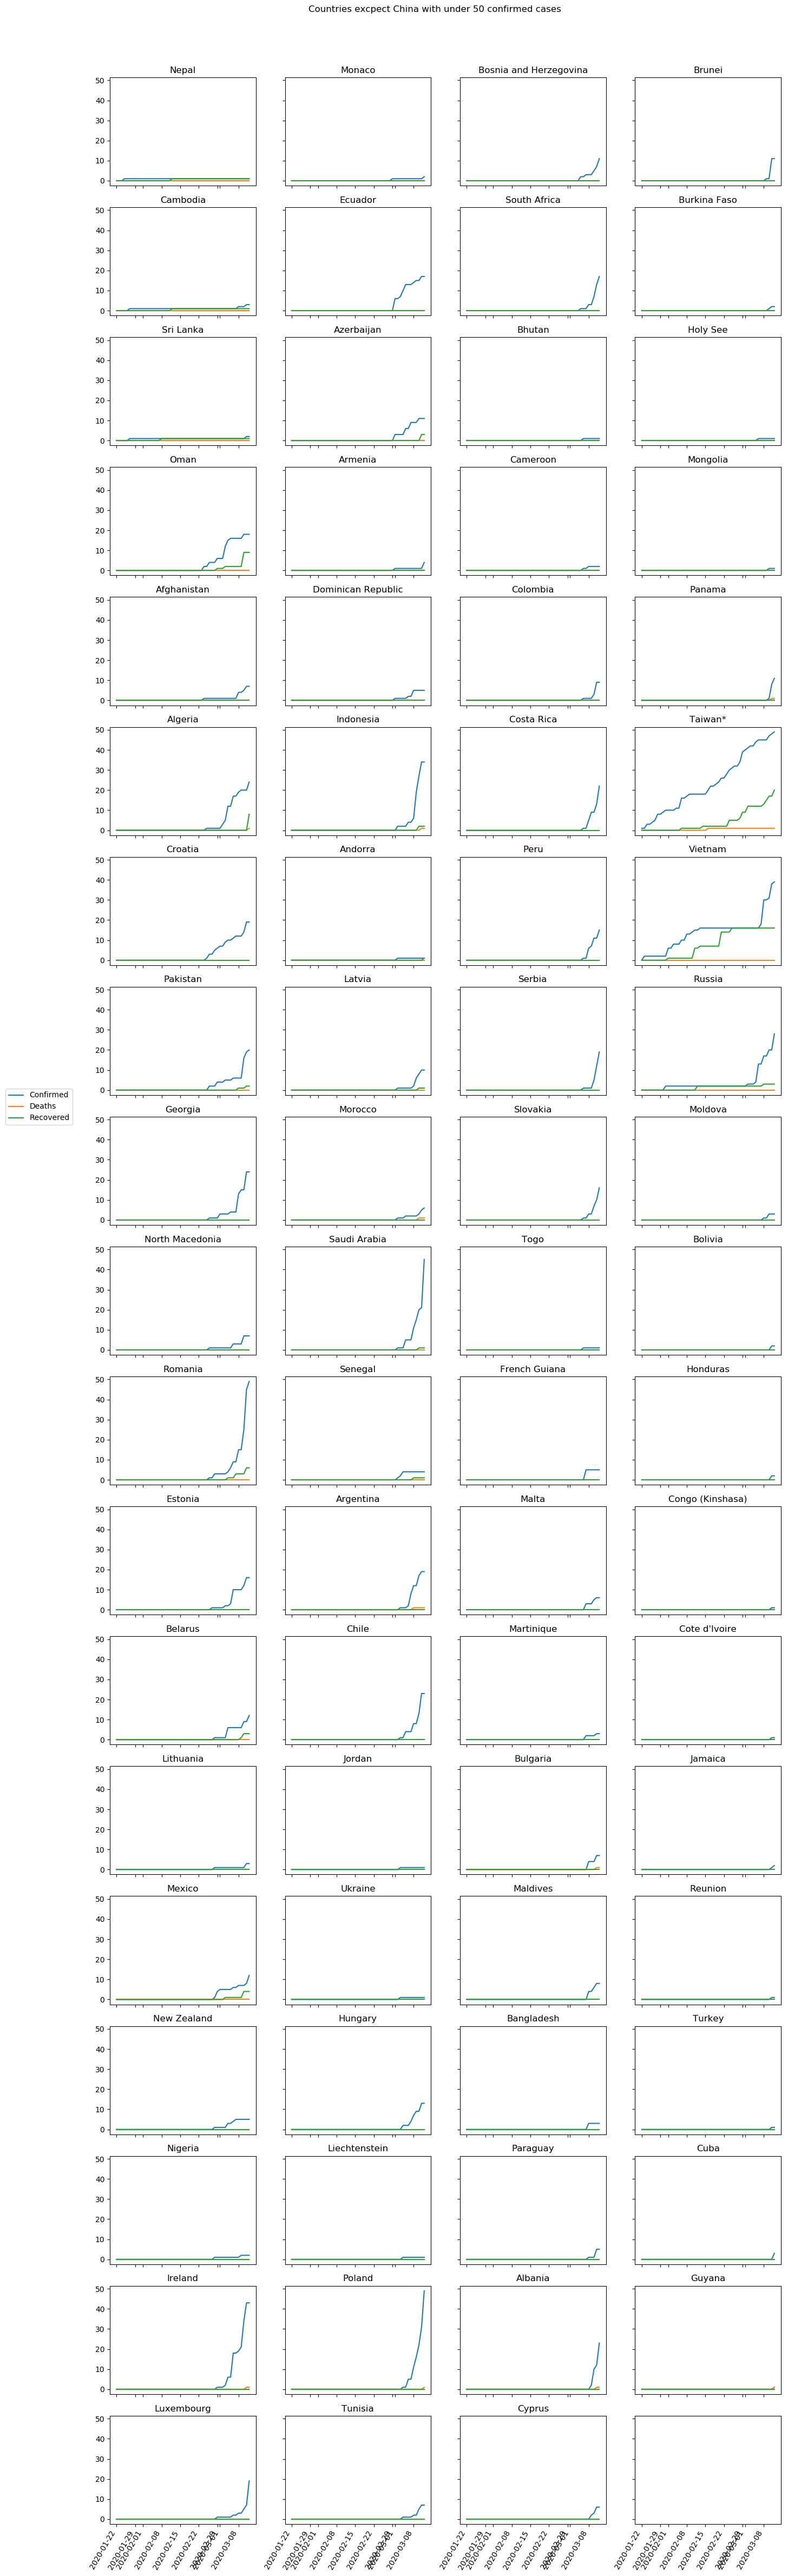

In [95]:
###plot for countries with confirmed cases over limit
plots_in_row = 4
#define how many rows on how many countries in list without china
plots_in_col = math.ceil((numOfRows)/plots_in_row)
#print(plots_in_col)
fig, axs = plt.subplots(plots_in_col, plots_in_row, figsize=(16, plots_in_col*3.5), sharey=True, sharex=True)
fig.autofmt_xdate(rotation=60)

axs0 = axs.shape[0]
axs1 = axs.shape[1]

i = 0
j = 0

for country in countries_over_limit["Country"]:
    #print(country)
    axs[i][j].plot(dates_datetime_confirmed, df_confirmed[df_confirmed['Country/Region']==country].iloc[:,4:].sum(axis=0))
    axs[i][j].plot(dates_datetime_deaths, df_deaths[df_deaths['Country/Region']==country].iloc[:,4:].sum(axis=0))
    axs[i][j].plot(dates_datetime_recovered, df_recovered[df_recovered['Country/Region']==country].iloc[:,4:].sum(axis=0))
    axs[i][j].set_title(country)
    #axs[i][j].set_xticklabels(rotation=90)
    i = i + 1
    if i==plots_in_col:
        i = 0
        j = j + 1
        if j==plots_in_row:
            j = 0
fig.suptitle('Countries excpect China with under {} confirmed cases'.format(limit_low),y=0.90)
fig.legend(['Confirmed', 'Deaths', 'Recovered'],loc='upper left', bbox_to_anchor=(0., 0.1, 0.5, 0.5),bbox_transform=plt.gcf().transFigure)
plt.savefig("img/rest_under_low_limit.png",bbox_inches='tight')

In [96]:
#df_confirmed

In [97]:
def make_df_colCountry_rowValues(df, countries_ts):
    #new df - columns will be countries, index is date
    df_colCountry_rowConfirmed = pd.DataFrame()
    #print(df_colCountry_rowConfirmed)
    for i, country in enumerate(countries_ts,0):
        column = df[df['Country/Region']==country].iloc[:,4:].sum(axis=0)
        df_colCountry_rowConfirmed.insert(i, country, column)
    print(df_colCountry_rowConfirmed.tail(3))
    return df_colCountry_rowConfirmed

In [98]:
df_colCountry_rowConfirmed = make_df_colCountry_rowValues(df_confirmed, countries_ts)
df_colCountry_rowDeaths = make_df_colCountry_rowValues(df_deaths, countries_ts)
df_colCountry_rowRecovered = make_df_colCountry_rowValues(df_recovered, countries_ts)

         Thailand  Japan  Singapore  Nepal  Malaysia  Canada  Australia  \
3/10/20        53    581        160      1       129      79        107   
3/11/20        59    639        178      1       149     108        128   
3/12/20        70    639        178      1       149     117        128   

         Cambodia  Sri Lanka  Germany  ...  Moldova  Bolivia  Honduras  \
3/10/20         2          1     1457  ...        3        0         0   
3/11/20         3          2     1908  ...        3        2         2   
3/12/20         3          2     2078  ...        3        2         2   

         Congo (Kinshasa)  Cote d'Ivoire  Jamaica  Reunion  Turkey  Cuba  \
3/10/20                 0              0        0        0       0     0   
3/11/20                 1              1        1        1       1     0   
3/12/20                 1              1        2        1       1     3   

         Guyana  
3/10/20       0  
3/11/20       0  
3/12/20       1  

[3 rows x 116 columns]
 

In [99]:
#przyrosty względne
rel_change_confirmed = df_colCountry_rowConfirmed.pct_change()

In [100]:
abs_change_confirmed = df_colCountry_rowConfirmed.diff()
abs_change_deaths = df_colCountry_rowDeaths.diff()
abs_change_recovered = df_colCountry_rowRecovered.diff()
print(abs_change_confirmed.tail(3))

         Thailand  Japan  Singapore  Nepal  Malaysia  Canada  Australia  \
3/10/20       3.0   70.0       10.0    0.0      12.0     2.0       16.0   
3/11/20       6.0   58.0       18.0    0.0      20.0    29.0       21.0   
3/12/20      11.0    0.0        0.0    0.0       0.0     9.0        0.0   

         Cambodia  Sri Lanka  Germany  ...  Moldova  Bolivia  Honduras  \
3/10/20       0.0        0.0    281.0  ...      2.0      0.0       0.0   
3/11/20       1.0        1.0    451.0  ...      0.0      2.0       2.0   
3/12/20       0.0        0.0    170.0  ...      0.0      0.0       0.0   

         Congo (Kinshasa)  Cote d'Ivoire  Jamaica  Reunion  Turkey  Cuba  \
3/10/20               0.0            0.0      0.0      0.0     0.0   0.0   
3/11/20               1.0            1.0      1.0      1.0     1.0   0.0   
3/12/20               0.0            0.0      1.0      0.0     0.0   3.0   

         Guyana  
3/10/20     0.0  
3/11/20     0.0  
3/12/20     1.0  

[3 rows x 116 columns]


In [101]:
#plt.plot(df_colCountry_rowConfirmed["Mainland China"].diff())

In [102]:
daily_abs_change_confirmed_all = abs_change_confirmed.sum(axis=1)
daily_abs_change_deaths_all = abs_change_deaths.sum(axis=1)
daily_abs_change_recovered_all = abs_change_recovered.sum(axis=1)

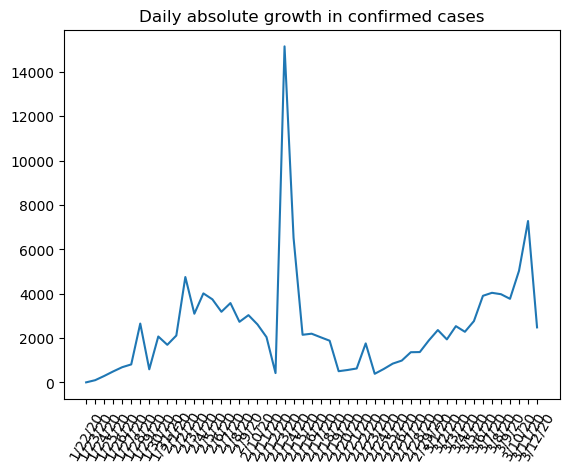

In [103]:
plt.plot(dates_confirmed, daily_abs_change_confirmed_all)
plt.xticks(rotation=60)
#plt.legend(['Absolute growth in confirmed cases'])
plt.title("Daily absolute growth in confirmed cases")
plt.savefig("img/abs_growth_confirmed.png",bbox_inches='tight')

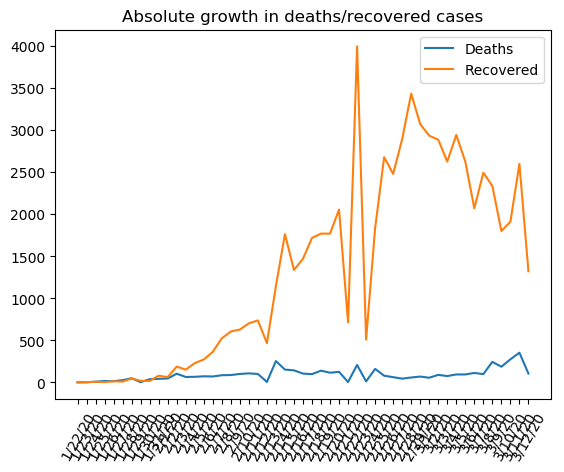

In [104]:
plt.plot(dates_confirmed, daily_abs_change_deaths_all, dates_confirmed,daily_abs_change_recovered_all)
plt.xticks(rotation=60)
plt.legend(['Deaths', 'Recovered'])
plt.title("Absolute growth in deaths/recovered cases")
plt.savefig("img/abs_growth_deaths_recovered.png",bbox_inches='tight')